In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from altaipony.ffd import FFD

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())

paperdir="/home/ekaterina/Documents/002_writing/flares-in-clusters-ii-draft/Flares_in_Clusters_with_K2_2/"

211931651, 211970427 (x2) stars with both LC and SC

In [18]:
df = pd.read_csv("../k2scoc/results/tables/2020_05_final_flares.csv")

In [42]:
df.groupby("EPIC").real.sum().sort_values(ascending=False).head(20)

EPIC
211832848    20
211916718    19
211723172    16
247649755    16
211997888    16
211970427    16
211845034    15
211042656    15
211896450    14
211937468    13
212015538    13
211931651    12
212077095    12
212086697    12
210863683    12
211911911    12
211905618    12
211993172    11
211915918    11
211988997    11
Name: real, dtype: int64

In [100]:
sdf = df[(df.EPIC==210317378) & (df.real==1)]

In [101]:
tobs = sdf.dtp_tot.unique().sum() / 2. / 24 / 365.25

Setting ED with new values, size 20.
Setting frequency values with new values, size 20.
Setting frequency adjusted count values with new values, size 20.


20


100%|██████████| 200/200 [00:06<00:00, 29.42it/s]


Fitted power law alpha=2.0642193319327626(0.035440583612734056/0.03454981062363505)
Fitted power law beta=908.091434729772(264.4681654405284/211.18534304010848)


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/ffd.py:431: UserWarning: Power law exponent is steep. Power of statistical tests decreases according to Maschberger and Kroupa 2009.
  warnings.warn('Power law exponent is steep. '


Text(0, 0.5, 'cumulative number of flares [yr$^{-1}$]')

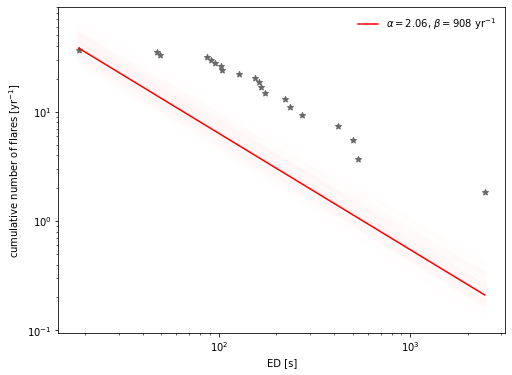

In [39]:
fig, ax =  plt.subplots(1, figsize=(8,6))

hasflares = (df.real==1) & (df.todrop.isnull())
ffd = FFD(f=sdf, tot_obs_time=tobs, ID="EPIC")

#---------- No correction ----------------
ed, freq, counts = ffd.ed_and_freq(energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.scatter(ed, freq, c="darkgrey", marker="*")#, label="no correction")


ffd.alpha_prior = 2.
ffd.beta_prior=800

BFA = ffd.fit_mcmc_powerlaw(steps=200, loglikelihood=loglikelihood_gauss_wheatland_ed)
print(f"Fitted power law alpha={ffd.alpha}({ffd.alpha_up_err}/{ffd.alpha_low_err})")
print(f"Fitted power law beta={ffd.beta}({ffd.beta_up_err}/{ffd.beta_low_err})")

ispowerlaw = ffd.is_powerlaw()
truncated = ffd.is_powerlaw_truncated()

ffd.plot_mcmc_powerlaw(ax, BFA, subset=50, linewidth=5, c="tomato", alpha=.005, zorder=-1)
ax.scatter(ffd.ed, ffd.freq, marker="*", c="dimgrey", )#label="all flaring stars contribute = above detection threshold")
a, x, y = ffd.plot_powerlaw(ax, c="r", 
                            label=(fr"$\alpha=${ffd.alpha:.2f}, "
                                   fr"$\beta=${int(np.rint(ffd.beta))}" + r" yr$^{-1}$"))

plt.xscale("log")
plt.yscale("log")
plt.legend(frameon=False)
plt.xlabel("ED [s]")
plt.ylabel(r"cumulative number of flares [yr$^{-1}$]")


# plt.savefig(f"plots/{tstamp}_full_sample_ffd_ED_wheatland.png", dpi=300)
# plt.savefig(f"{paperdir}pics/FFDs/full_sample_ffd_ED_wheatland.png", dpi=300)

In [38]:
from altaipony.wheatland import calculate_joint_posterior_distribution, gaussian_prior

def loglikelihood_gauss_wheatland_ed(theta, *args):
    '''Log likelihood to pass to BayesianFlaringAnalysis
    for fitting the powerlaw following Wheatland 2004.
    Using a gaussian prior for alpha.
    '''
    mu = float(open(f"{paperdir}values/gauss_wheatland_alpha_mu.txt", "r").read())
    sigma = float(open(f"{paperdir}values/gauss_wheatland_alpha_sigma.txt", "r").read())
    
    def prior(x):
        return gaussian_prior(x, mu, sigma)
    return calculate_joint_posterior_distribution(theta, *args, prior)

In [165]:
from altaipony.lcio import from_mast, from_path

In [149]:
flc1 = from_mast("EPIC 211931651", c=13, mission="K2", mode="LC" ,cadence="long")

8% (301/3944) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (301/3944) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


{'time': array([2987.58111287, 2987.60154513, 2987.6219772 , ..., 3068.10257082,
       3068.12300264, 3068.14343465]), 'flux': array([      nan, 404905.66, 404685.47, ..., 405240.5 , 405366.22,
       405641.94], dtype=float32), 'flux_err': array([      nan, 17.557951, 17.585594, ..., 17.922756, 17.880589,
       17.849276], dtype=float32), '_flux_unit': Unit("electron / s"), 'time_format': 'bkjd', 'time_scale': 'tdb', 'targetid': 210651981, 'label': 'EPIC 210651981', 'meta': {}, 'centroid_col': array([255.52224272, 255.57405436, 255.62756902, ..., 256.4697294 ,
       256.54532963, 256.59088385]), 'centroid_row': array([725.31744744, 725.30532273, 725.29500638, ..., 725.1038204 ,
       725.09031492, 725.08386216]), 'quality': array([524288,      0,      0, ...,      0,      0, 524288], dtype=int32), 'cadenceno': array([140878, 140879, 140880, ..., 144819, 144820, 144821], dtype=int32), 'quality_bitmask': 'default', 'channel': 79, 'campaign': 13, 'quarter': None, 'mission': 'K2', 'ra

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/lcio.py:53: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/K2/ktwo210651981-c13_lc/ktwo210651981-c13_llc.fits' mode='rb' closefd=True>
  return _from_mast_K2(targetid, mode, c, **kwargs)


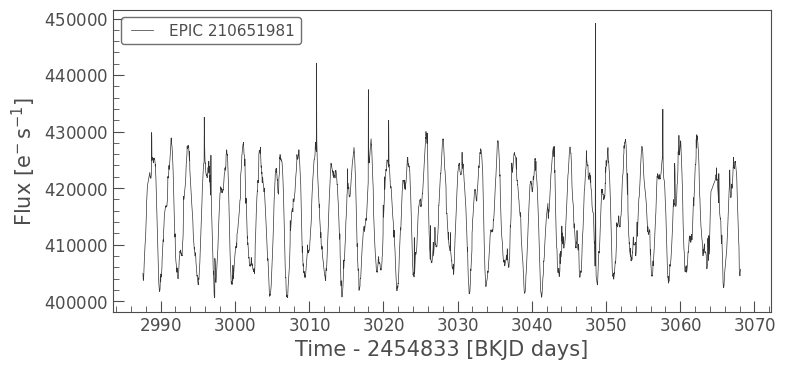

In [150]:
flc1.plot()
#plt.ylim(110000,120000)

In [117]:
len(flc1.flux)/3000

34.20666666666666

In [104]:
flc1d = flc1.detrend("savgol")

(2250.0, 2255.0)

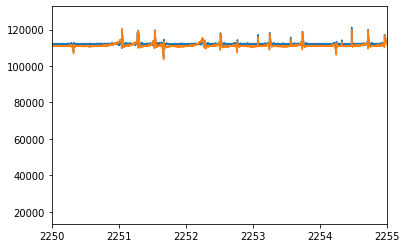

In [106]:
plt.plot(flc1d.time, flc1d.detrended_flux)
plt.plot(flc1d.time, flc1d.flux)
#plt.ylim(2700,4000)
plt.xlim(2250,2255)

In [107]:
flares = flc1d.find_flares().flares

Found 300 candidate(s) in the (0,102620) gap.


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_laun

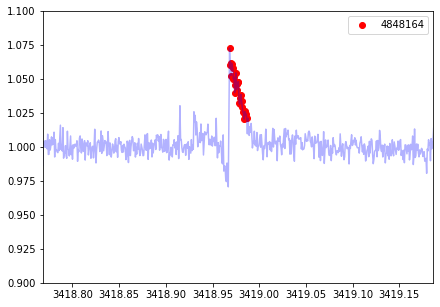

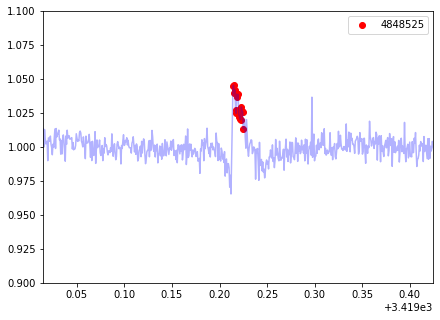

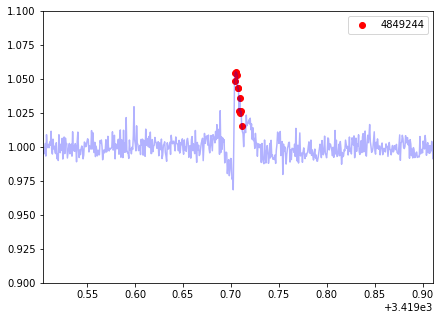

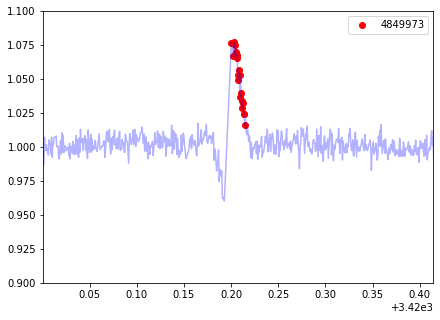

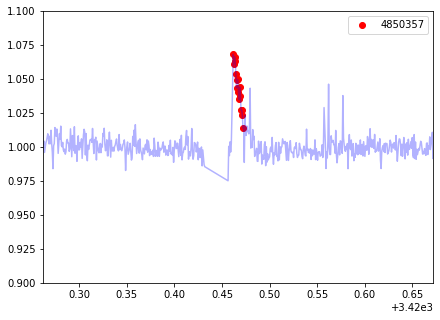

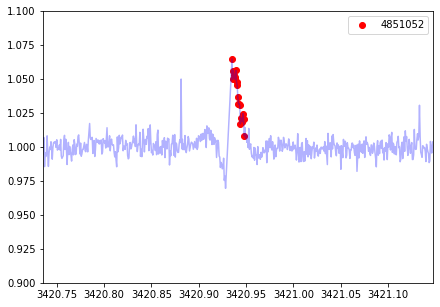

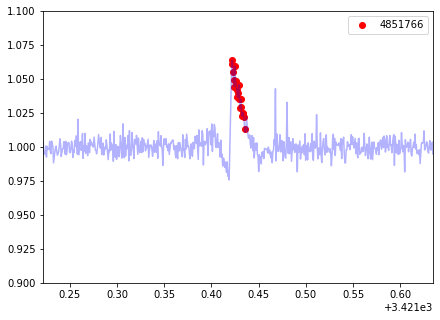

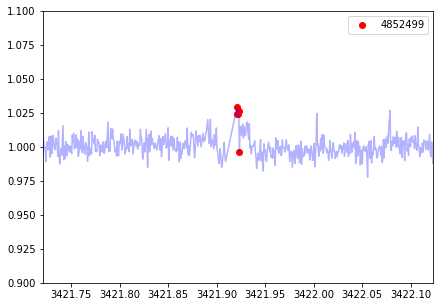

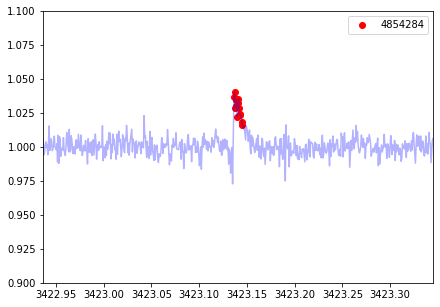

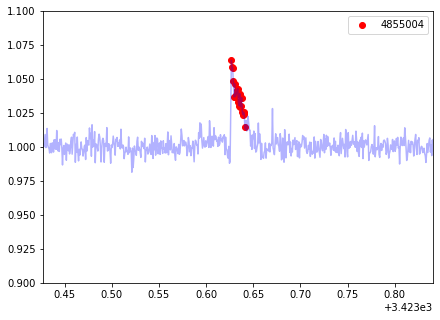

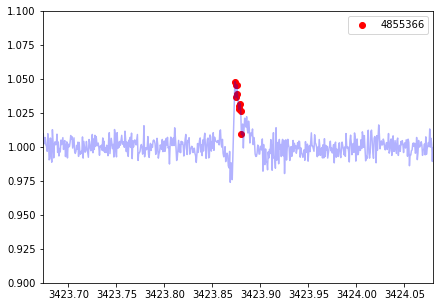

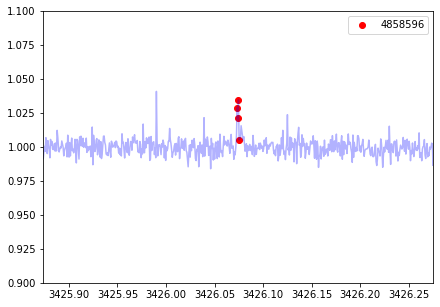

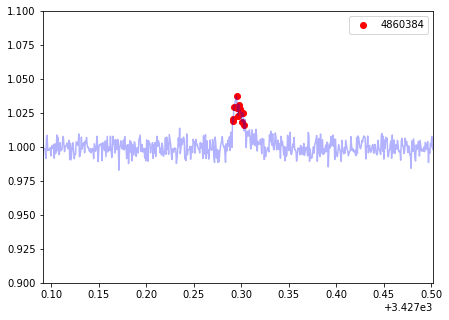

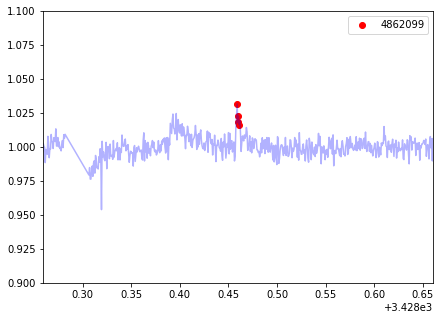

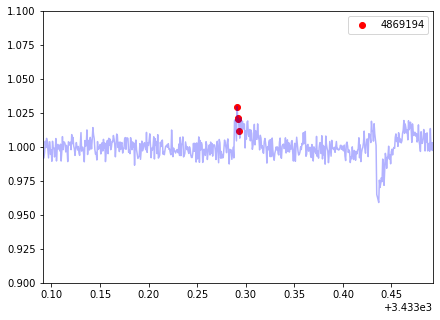

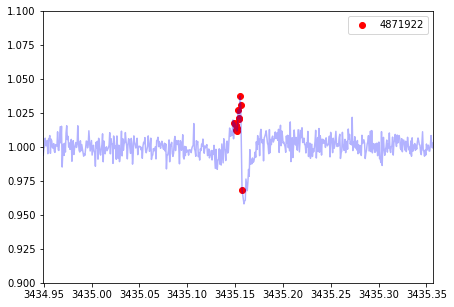

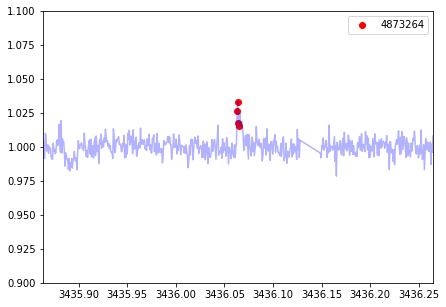

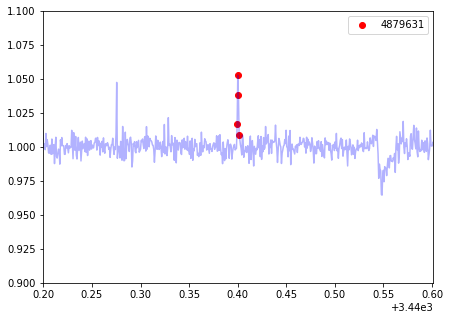

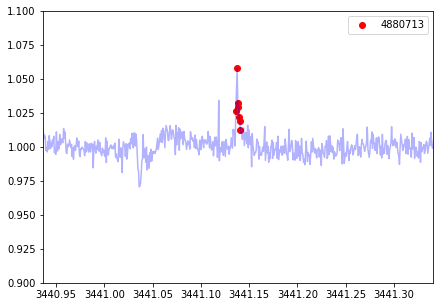

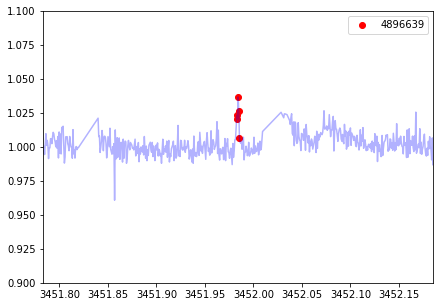

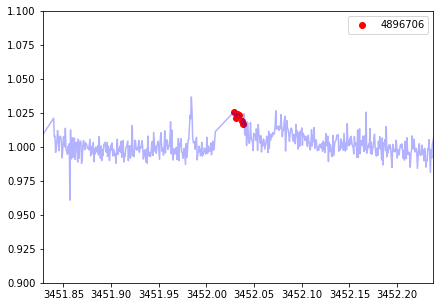

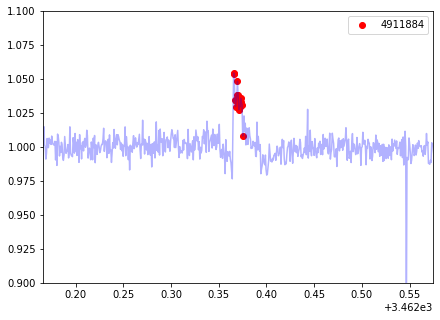

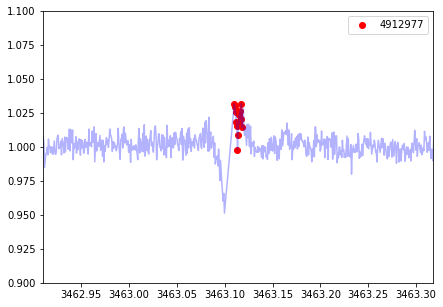

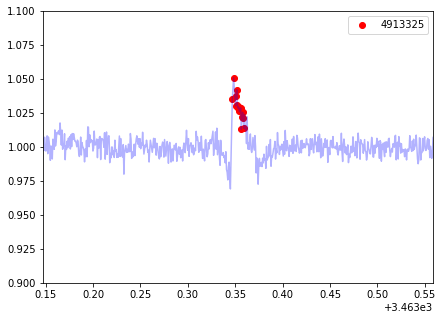

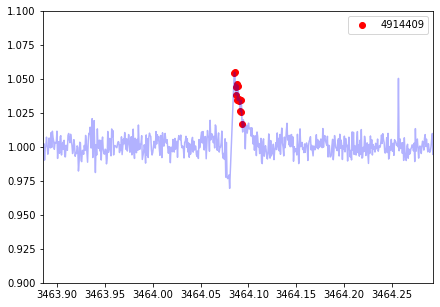

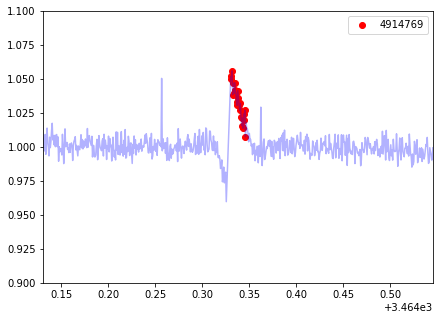

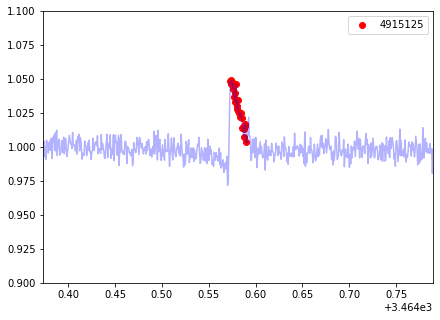

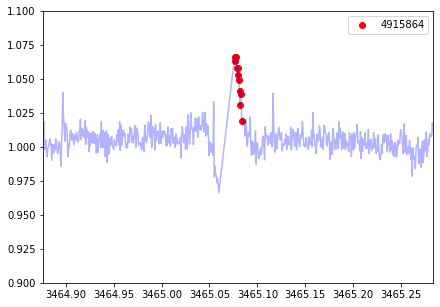

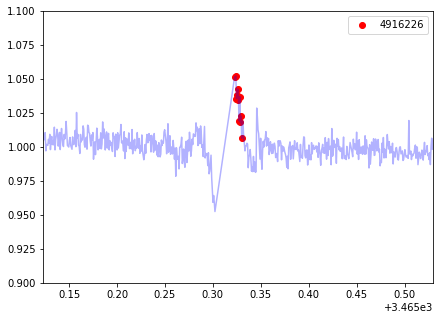

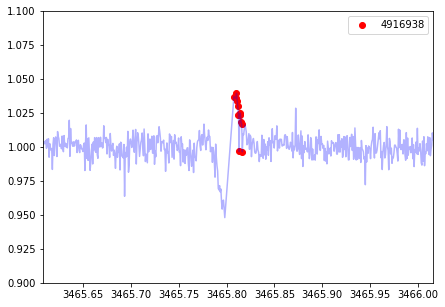

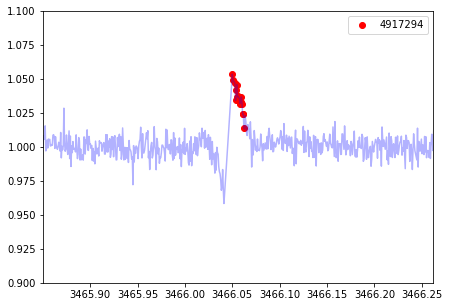

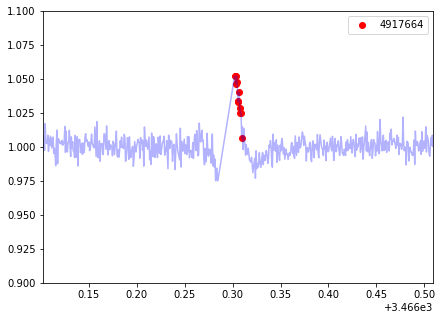

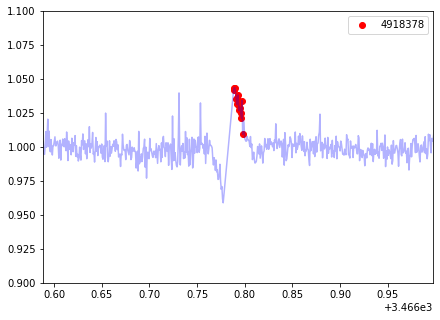

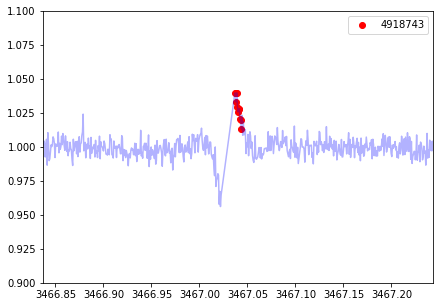

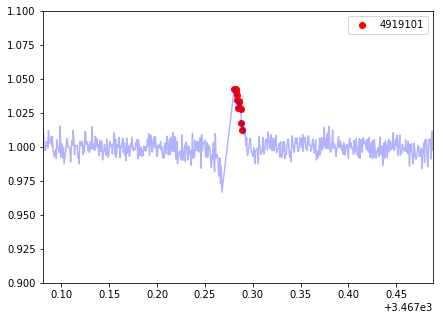

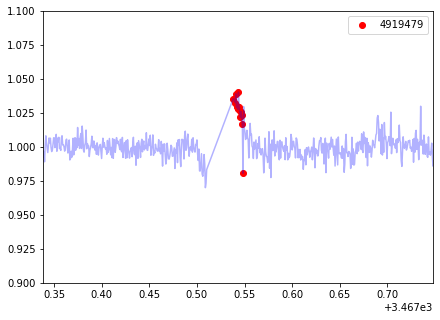

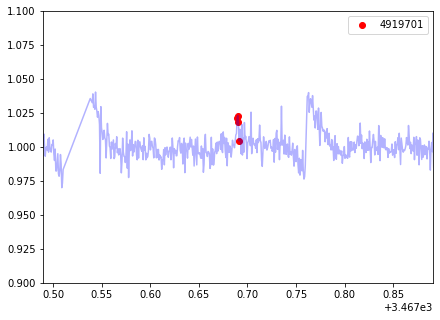

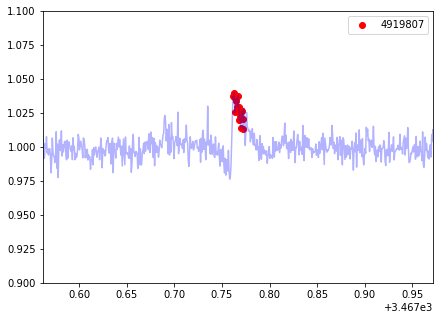

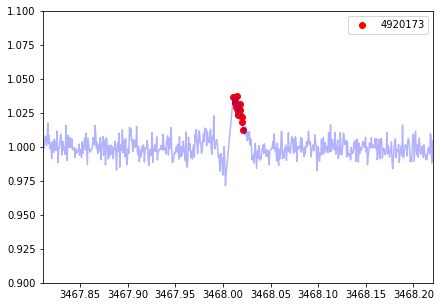

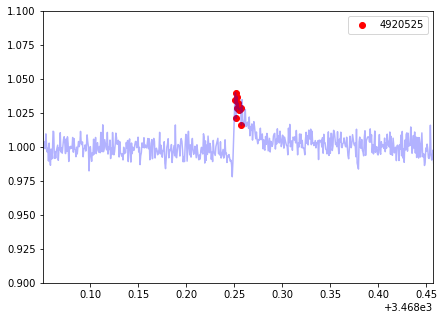

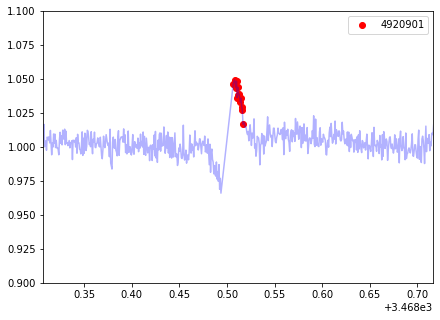

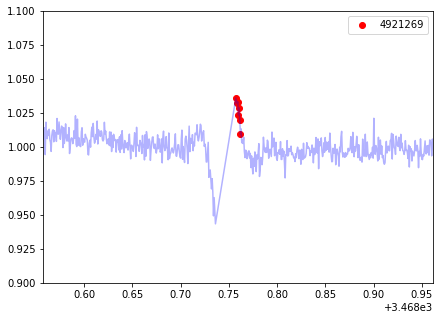

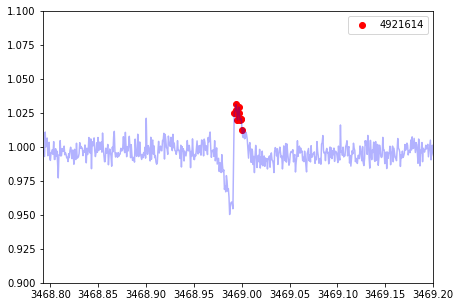

In [89]:
flc = corr_lc
for i, r in flares2.iterrows():
    plt.figure(figsize=(7,5))
    plt.plot(flc.time, flc.detrended_flux,c="k")
    plt.plot(flc.time, flc.flux,c="b", alpha=.3)
    sta, sto = int(r.istart), int(r.istop)+1
    plt.scatter(flc.time[sta:sto], flc.flux[sta:sto], c="r", label=r.cstart)#, label=f"EPIC {EPIC}, C{C}")#
    plt.xlim(r.tstart-.2,r.tstop+.2)
    plt.ylim(.9,1.1)
    plt.legend()
   # plt.savefig(f"plots/EPIC_{EPIC}_C{C}_{r.istart}_multiperiod.png",dpi=300)
    #print(r.istart)

In [151]:

# Remove nans and outliers
lc = flc1.remove_nans().remove_outliers()

# Remove long term trends
lc = lc.flatten(window_length=401)



In [159]:
corr_lc = lc.to_corrector("sff").correct(windows=10)

In [160]:
corr_lcd = corr_lc.detrend("savgol")
flares2 = corr_lcd.find_flares().flares

Found 1 candidate(s) in the (0,29) gap.
Found 1 candidate(s) in the (29,2289) gap.
Found 1 candidate(s) in the (2289,2797) gap.
Found 1 candidate(s) in the (2797,3488) gap.
Found 0 candidate(s) in the (3488,3541) gap.
Found 0 candidate(s) in the (3541,3628) gap.


In [167]:
flck2sc = from_path(f"../k2scoc/pony_k2sc_k2_llc_{ID}-c13_kepler_v2_lc.fits", mode="AltaiPony", mission="K2")

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/lcio.py:139: ResourceWarning: unclosed file <_io.FileIO name='../k2scoc/pony_k2sc_k2_llc_210651981-c13_kepler_v2_lc.fits' mode='rb' closefd=True>
  return _from_path_AltaiPony(path)


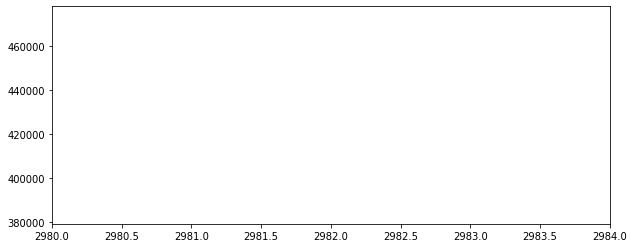

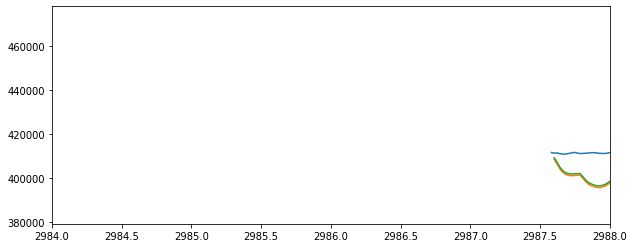

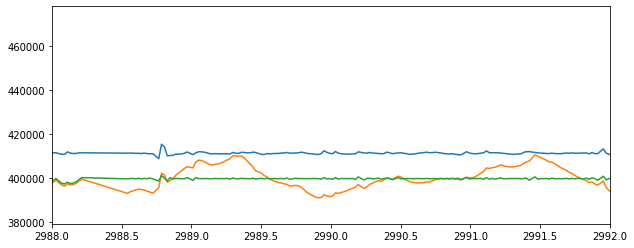

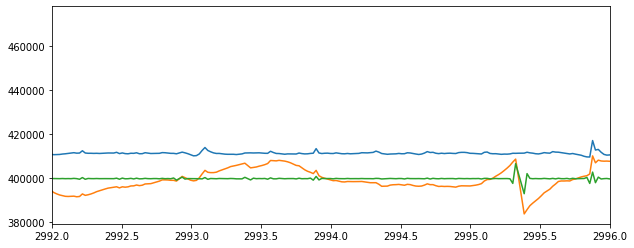

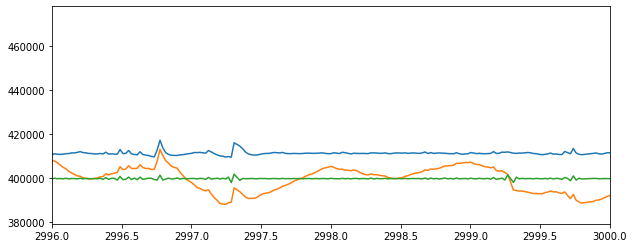

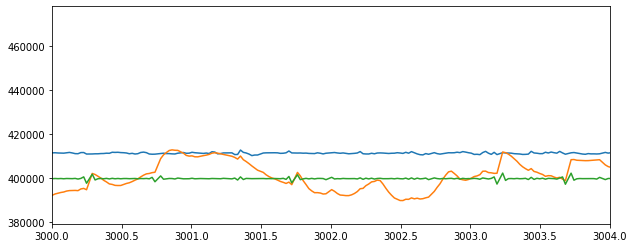

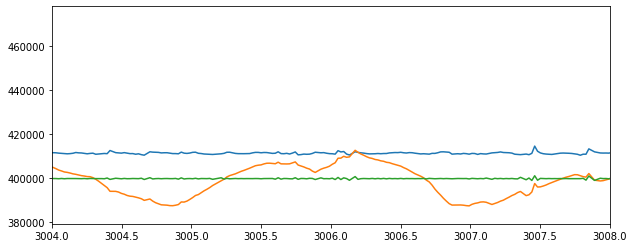

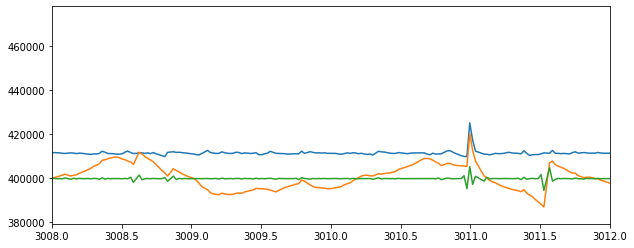

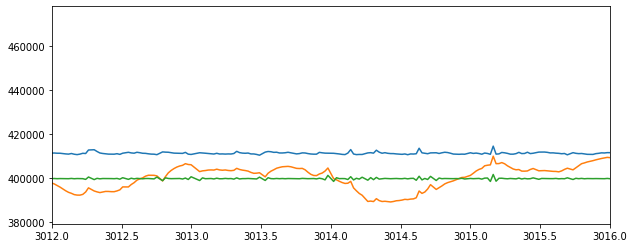

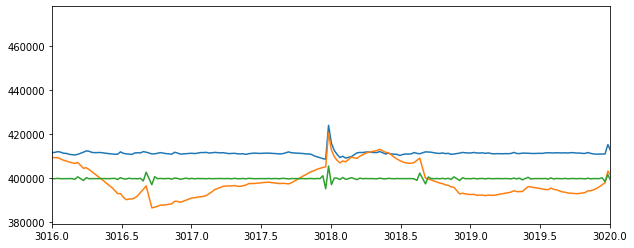

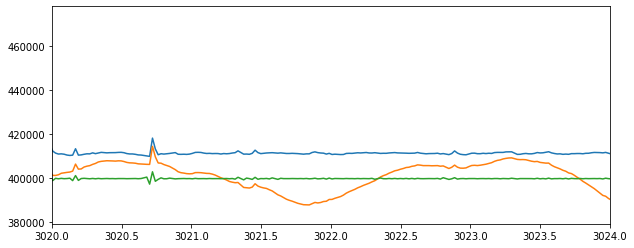

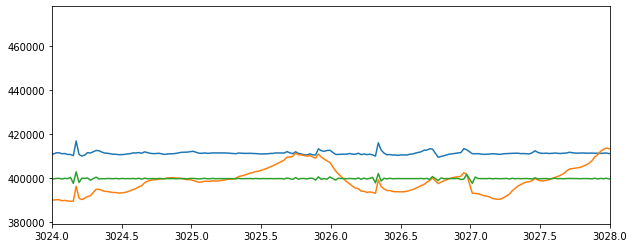

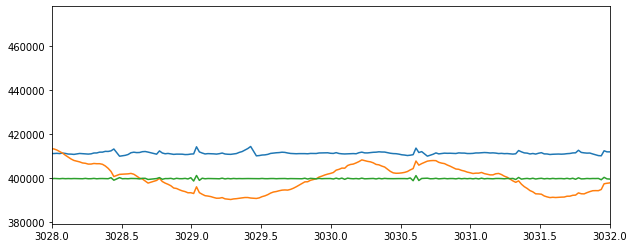

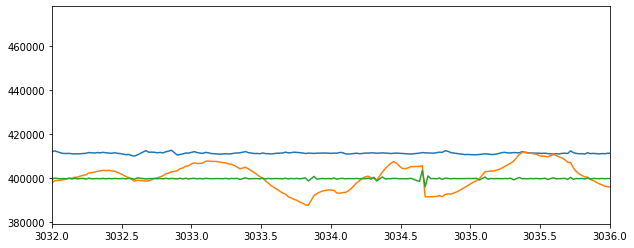

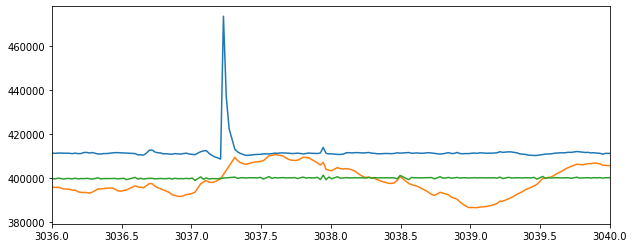

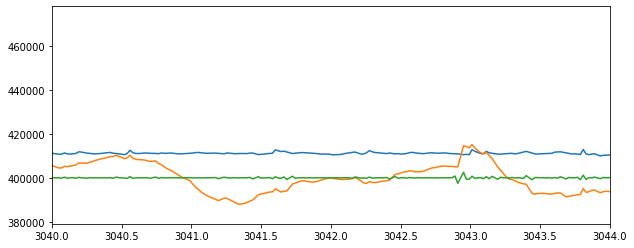

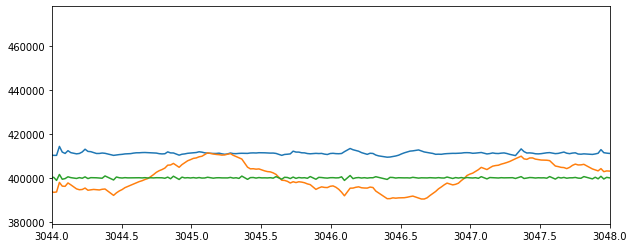

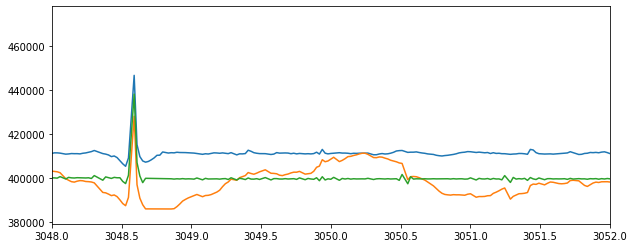

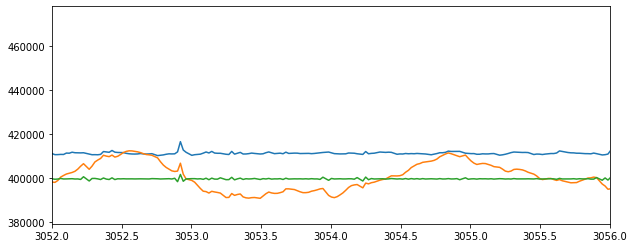

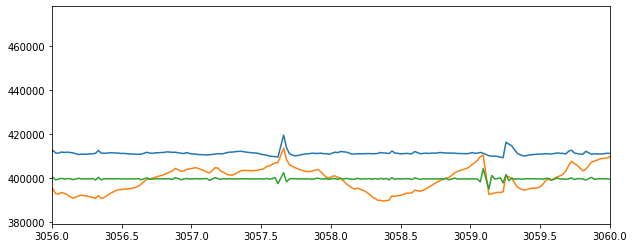

In [170]:
for x in range(0,80,4):
    plt.figure(figsize=(10,4))
    plt.plot(flck2sc.time, flck2sc.detrended_flux)
    plt.plot(corr_lc.time, corr_lc.flux*4e5)
    plt.plot(corr_lcd.time, corr_lcd.detrended_flux*4e5)
    #plt.plot(flc1d.time, flc1d.detrended_flux, label="detrended savgol")
    #plt.plot(flc1d.time, flc1d.flux)

    #plt.ylim(11100,12700)
    plt.xlim(2980+x,2984+x)

In [118]:
ra = pd.read_csv("tables/raetz2020.tsv", delimiter="\t", skiprows=82)

In [136]:
ras = set(ra.EPIC.values)

In [143]:
dfs = set(df.loc[df.todrop.isnull(),"EPIC"].values)

In [144]:
ras.intersection(dfs)

{210317378, 210651981}

In [148]:
ID = 210651981

ra.loc[ra.EPIC==ID, "Nflares(LC)"].values, df[(df.real==1) &(df.EPIC==ID) & (df.todrop.isnull())].shape[0], df[(df.EPIC==ID) & (df.todrop.isnull())].shape[0] 

(array([12]), 3, 3)

In [ ]:
210317378, 6, 